#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from importlib import reload

In [2]:
plt.style.use('./styles.txt')

#### Index

## Introduction

### Data Loading and Processing

In [3]:
df = utils.LoadDf()
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,1992,1,0.10,A,43.325000,-101.018500,SD,5.257143,-2.928571,81.142857,...,0.000000,0.00,5.399184,3.5,47.062041,-1.8,1889.074286,-48.6,28.913469,-4.3
1,1992,1,1.00,B,33.058333,-79.979167,SC,13.700000,9.885714,81.428571,...,55.589796,-4.40,7.196327,0.1,5.575510,2.0,15648.559592,-14.9,19.071020,2.4
2,1992,2,0.25,A,40.775000,-74.854160,NJ,6.385714,1.585714,67.185714,...,9.546510,0.00,19.731020,4.0,34.516735,-10.6,16492.948163,-254.6,75.711429,-0.9
3,1992,3,1.91,B,31.018500,-83.297300,GA,14.457143,11.828571,78.957143,...,59.321224,-9.70,9.142041,-4.1,11.228571,0.2,16679.204898,223.6,21.585306,-8.4
4,1992,3,2.00,B,30.728900,-87.238100,FL,14.428571,10.985714,79.971429,...,0.213355,-1.32,10.262857,-7.9,27.382857,6.7,19587.093469,-24.8,13.107755,-2.7


In [4]:
df = utils.BasicPreprocessing(df)
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992,1,0.10,A,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,1992,1,1.00,B,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,...,0,0,0,0,0,0,0,0,0,0
2,1992,2,0.25,A,40.775000,-74.854160,6.385714,1.585714,67.185714,1.394286,...,0,0,0,0,0,0,0,0,0,0
3,1992,3,1.91,B,31.018500,-83.297300,14.457143,11.828571,78.957143,4.685714,...,0,0,0,0,0,0,0,0,0,0
4,1992,3,2.00,B,30.728900,-87.238100,14.428571,10.985714,79.971429,0.188571,...,0,0,0,0,0,0,0,0,0,0


# AdaBoost

In [5]:
import model_utils
from sklearn.model_selection import train_test_split

X, y = model_utils.GenerateXy(df)

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

cv_scores = []
n_est_range = list(range(1, 51))

for n_est in n_est_range:
    ada = AdaBoostClassifier(n_estimators=n_est)
    cv_scores.append(np.mean(cross_val_score(ada, X_train, y_train, cv=5)))
    
    print(n_est, end="\r")

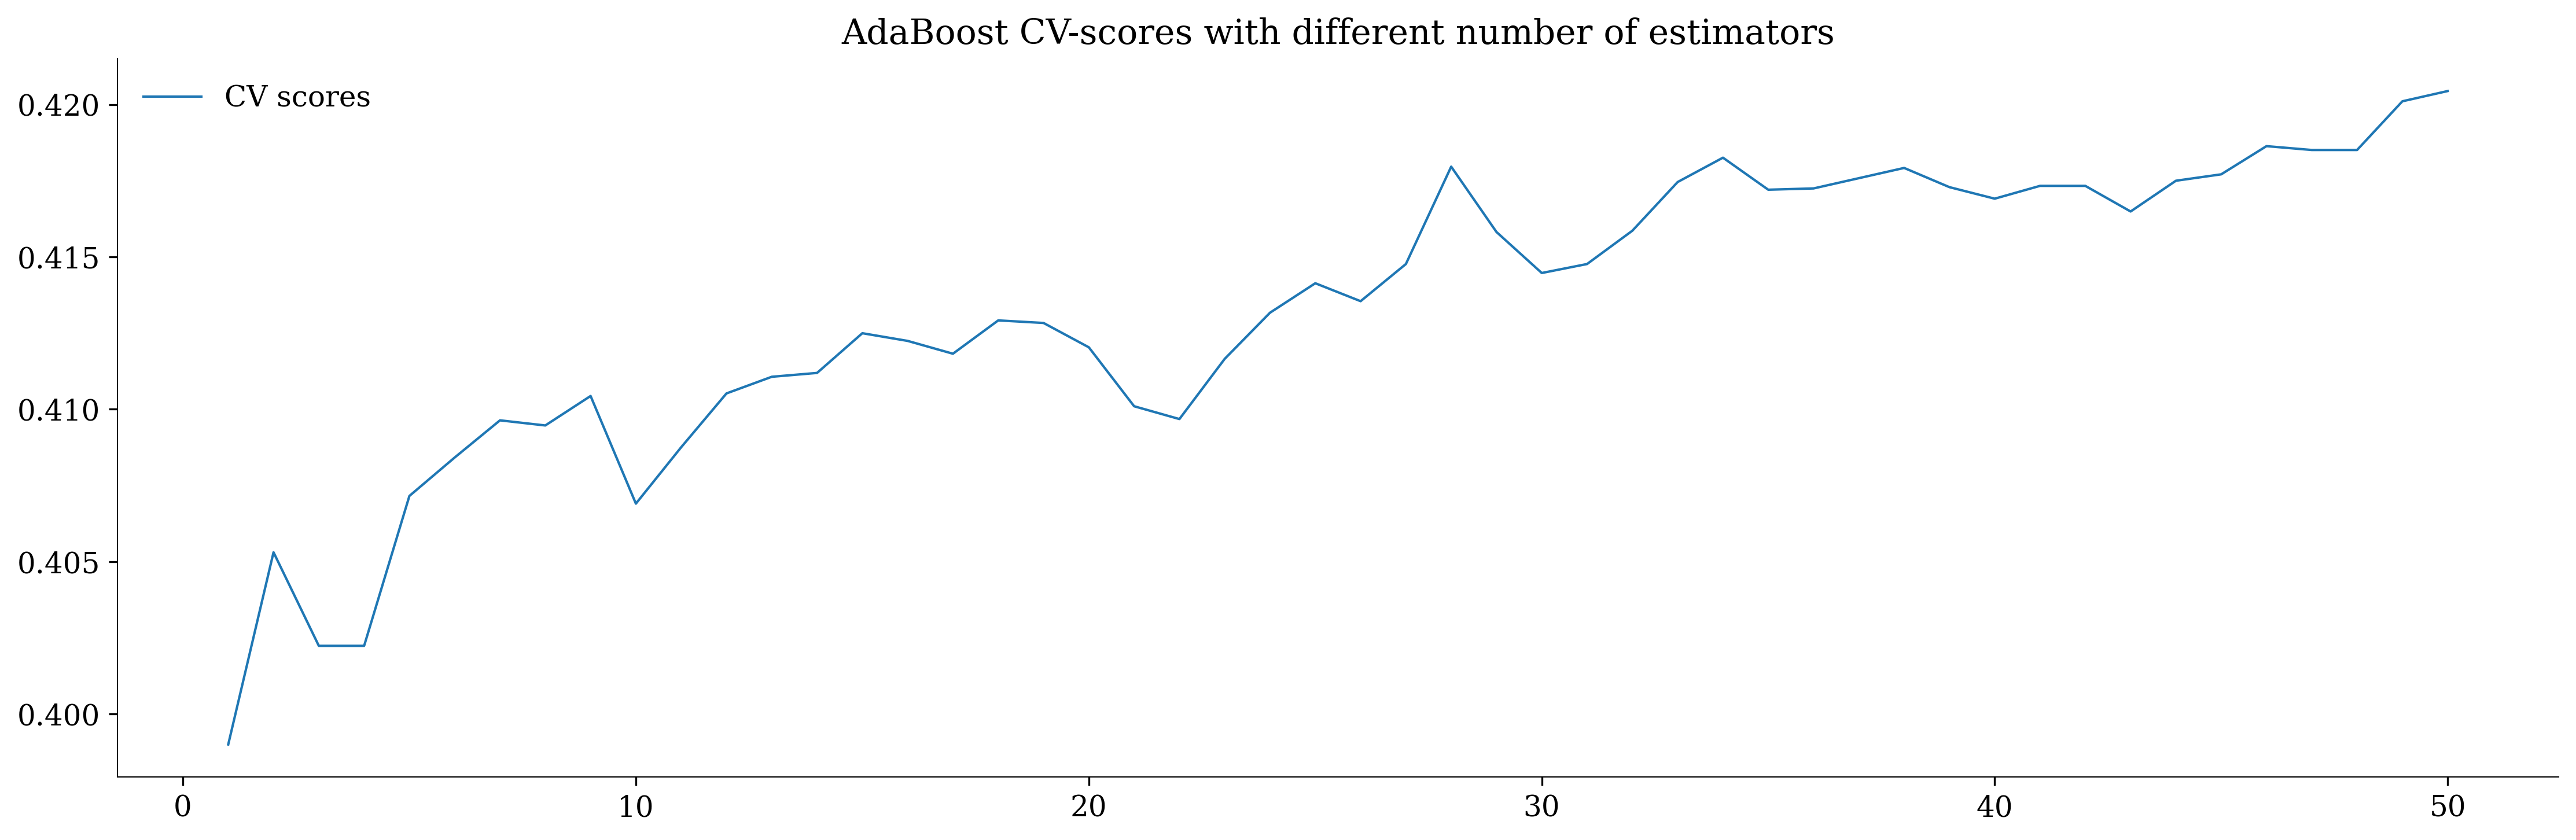

In [24]:
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(n_est_range, cv_scores, label="CV scores")
plt.legend()
plt.title("AdaBoost CV-scores with different number of estimators")
plt.show()

# XGBoost